# Informacion General
*   Red Neuronal
*   Universidad Panamericana
*   Jose Alexander Romero, Angel Esqueda Ochoa, Leonardo Kenji Minemura
*   Entrega: 31/05/23
*   Version 2
*   EL Proposito de este codigo es aprender de los datos y realizar clasificacion y regresion. Dentro del codigo se realiza visualizacion y limpieza de datos, clasificacion y regresion

# Dependencias

In [158]:
#Dependencias

##Load necesary librearies
# libraries to manipulate the data and to visualise it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# this is the library that contains the NN capabilities
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# the evaluation metrics for regression
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from math import sqrt
import seaborn as sn
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Import the data, preapre and visualize it 

1) age: continuous. 

2)workclass: 

3)fnlwgt: 

4)education: 

5)education-num: 

6)marital-status: 

7)occupation: 

8)relationship:

9)race: 

10)sex: 

11)capital-gain: 

12)capital-loss: 

13)hours-per-week: 

14)native-country

In [159]:
##carga un archivo CSV en un DataFrame, muestra información sobre el tamaño del conjunto de datos y muestra una vista previa de las primeras filas.
df = pd.read_csv(filepath_or_buffer = '/content/adult.data', names = ['age','work class','fnlwgt','education', 'education num','marital status','occupation','relationship','race', 'sex', 'capital gain', 'capital loss', 'hours per week', 'native country', 'salary'])
data = [df]
print('The dataset contains {} observations and {} features\n'.format(df.shape[0],df.shape[1]))

df.head()

The dataset contains 32561 observations and 15 features



,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [160]:
# checar el numero de observaciones para 'salary'
df.groupby('salary').size()

salary
 <=50K    24720
 >50K      7841
dtype: int64

In [161]:
# Analisis de 5 numeros para analizar estadisticamente los datos
df.describe()

,age,fnlwgt,education num,capital gain,capital loss,hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [162]:
#Convertir 'salario' a int
salary_map={' <=50K':1,' >50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)

df.head(4)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1


In [163]:
#Convertir 'sex' a int
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

df.head(4)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1


<ipython-input-164-4ec1f528d026>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


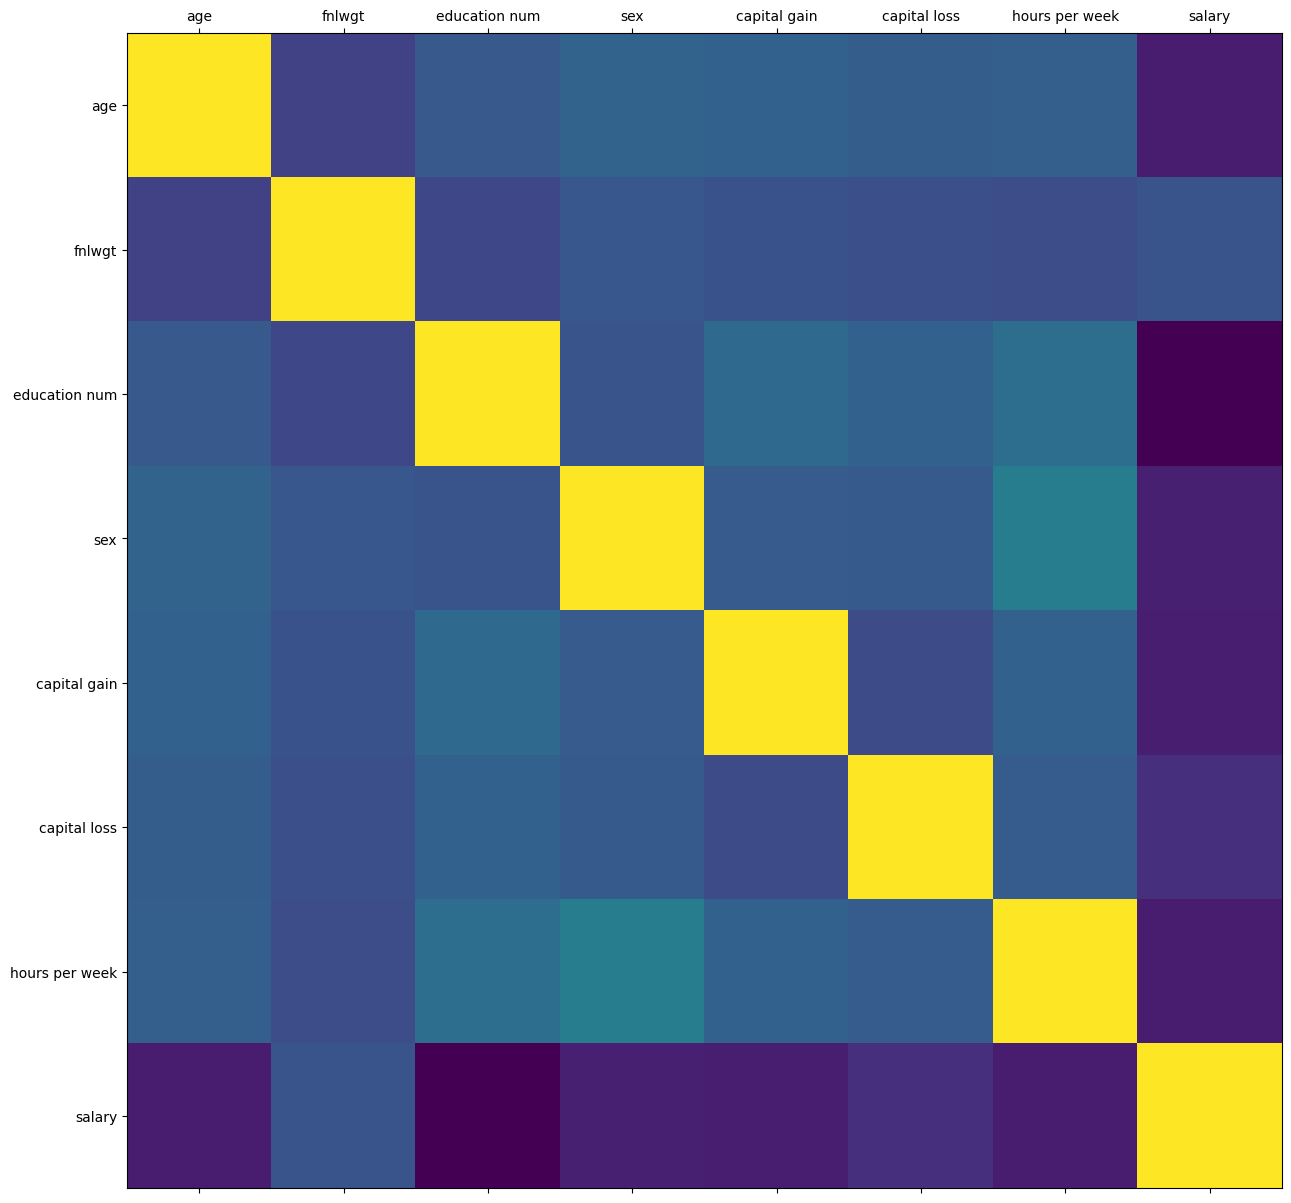

In [164]:
# Crear una matriz de correlacion para analizar como se relacionan los datos 
corr= df.corr()
fig, ax =plt.subplots(figsize=(15,15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [165]:
# Deshacerse de los valores '?'
df['native country'] = df['native country'].replace(' ?',np.nan)
df['work class'] = df['work class'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

In [166]:
# Convertir 'native country' a int 
for dataset in data:
    dataset.loc[dataset['native country'] != ' United-States', 'native country'] = 'Non-US'
    dataset.loc[dataset['native country'] == ' United-States', 'native country'] = 'US'

df['native country'] = df['native country'].map({'US':1,'Non-US':0}).astype(int)

df.head(4)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1


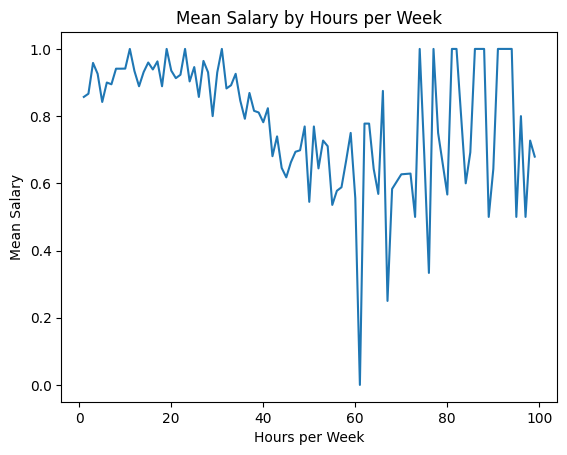

In [167]:
# Graficar la relacion entre 'hours per week' y 'salary'
mean_salary_by_hours = df.groupby('hours per week')['salary'].mean()

plt.plot(mean_salary_by_hours.index, mean_salary_by_hours.values)
plt.xlabel('Hours per Week')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Hours per Week')

plt.show()

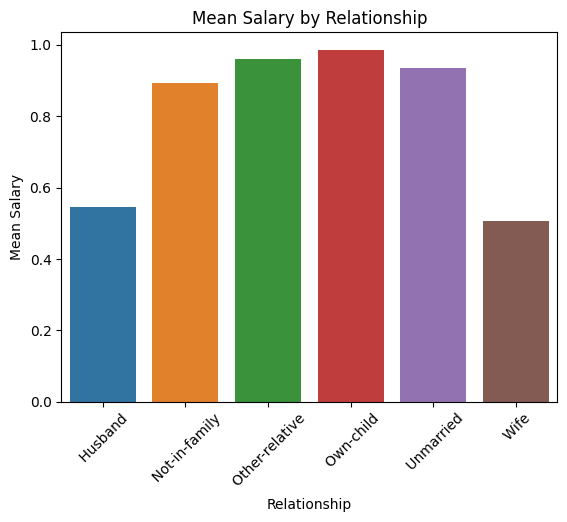

In [168]:
# Graficar la relacion entre 'relationship' y 'salary'
mean_salary_by_relationship = df.groupby('relationship')['salary'].mean().reset_index()

sn.barplot(x='relationship', y='salary', data=mean_salary_by_relationship)
plt.xlabel('Relationship')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Relationship')

plt.xticks(rotation=45)  

plt.show()

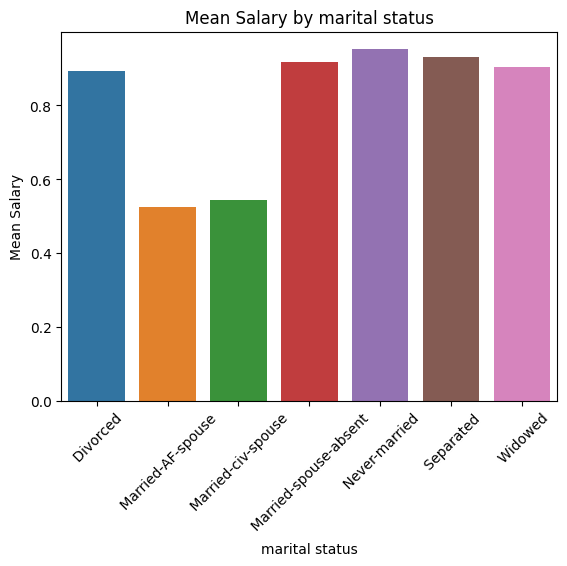

In [169]:
## Graficar la relacion entre 'marital status' y 'salary'
mean_salary_by_marital_status = df.groupby('marital status')['salary'].mean().reset_index()

sn.barplot(x='marital status', y='salary', data=mean_salary_by_marital_status)
plt.xlabel('marital status')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by marital status')

plt.xticks(rotation=45)  

plt.show()

In [170]:
# Agrupar lod datos en 'Single' y 'Couple'
df['marital status'] = df['marital status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital status'] = df['marital status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

df.head(4)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,1,0,0,40,1,1


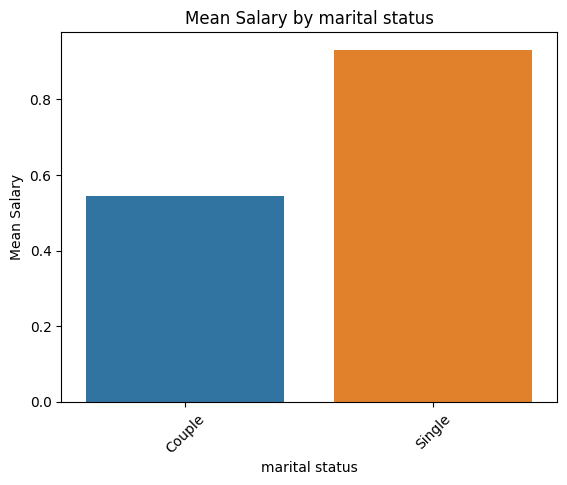

In [171]:
# Graficar la relacion entre 'marital status' y 'salary'
mean_salary_by_marital_status = df.groupby('marital status')['salary'].mean().reset_index()

sn.barplot(x='marital status', y='salary', data=mean_salary_by_marital_status)
plt.xlabel('marital status')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by marital status')

plt.xticks(rotation=45)  

plt.show()

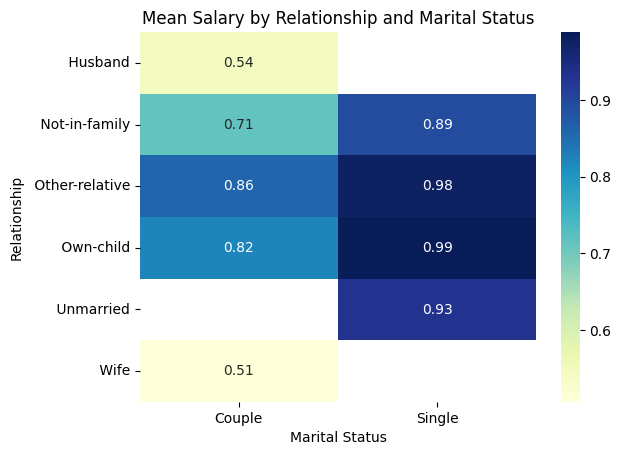

In [172]:
# Graficar la relacion entre 'relatioship', 'marital status' y 'salary'
mean_salary_by_relationship_marital = df.groupby(['relationship', 'marital status'])['salary'].mean().reset_index()

pivot_table = mean_salary_by_relationship_marital.pivot(index='relationship', columns='marital status', values='salary')

sn.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')

plt.xlabel('Marital Status')
plt.ylabel('Relationship')
plt.title('Mean Salary by Relationship and Marital Status')

plt.show()

In [173]:
# Convertir 'marital status' a int 
df['marital status'] = df['marital status'].map({'Couple':0,'Single':1})

rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)

df.head(4)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1


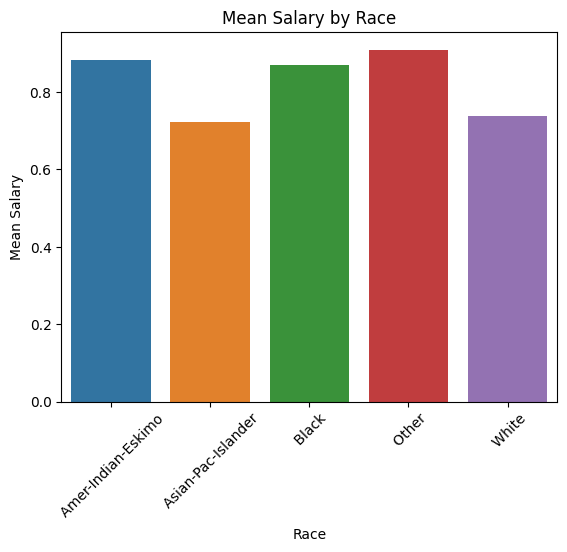

In [174]:
# Graficar la relacion entre 'race' y 'salary'
mean_salary_by_race = df.groupby('race')['salary'].mean().reset_index()

sn.barplot(x='race', y='salary', data=mean_salary_by_race)

plt.xlabel('Race')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Race')

plt.xticks(rotation=45)  

plt.show()

In [175]:
#Convertir 'race' a int 
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}
df['race']= df['race'].map(race_map)

df.head(4)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1


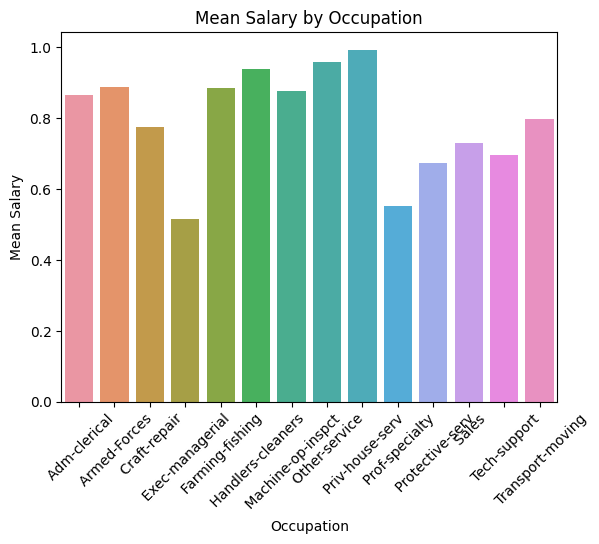

In [176]:
# Graficar la relacion entre 'occupation' y 'salary'
mean_salary_by_occupation = df.groupby('occupation')['salary'].mean().reset_index()

sn.barplot(x='occupation', y='salary', data=mean_salary_by_occupation)
plt.xlabel('Occupation')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Occupation')

plt.xticks(rotation=45)  

plt.show()

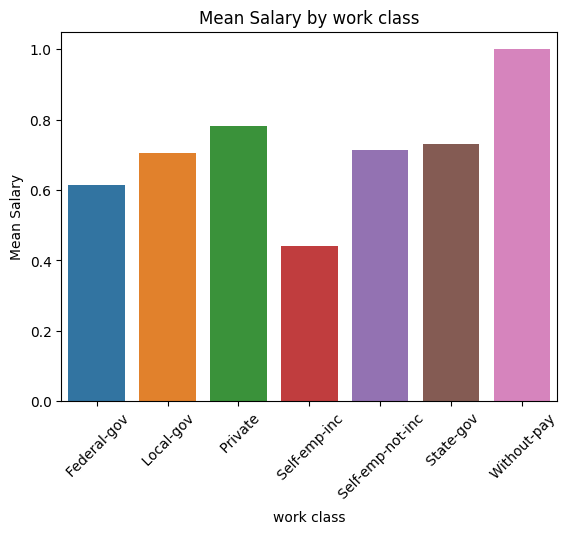

In [177]:
# Graficar la relacion entre 'work class' y 'salary'
mean_salary_by_work_class = df.groupby('work class')['salary'].mean().reset_index()

sn.barplot(x='work class', y='salary', data=mean_salary_by_work_class)
plt.xlabel('work class')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by work class')

plt.xticks(rotation=45)  

plt.show()

In [178]:
# Agrupar los datos de 'work class' y meterlos a una nueva columna llamada 'employment type'
def f(x):
    if x['work class'] == ' Federal-gov' or x['work class']== ' Local-gov' or x['work class']==' State-gov': return 'govt'
    elif x['work class'] == ' Private':return 'private'
    elif x['work class'] == ' Self-emp-inc' or x['work class'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment type']=df.apply(f, axis=1)

df.head(4)



,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary,employment type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,private


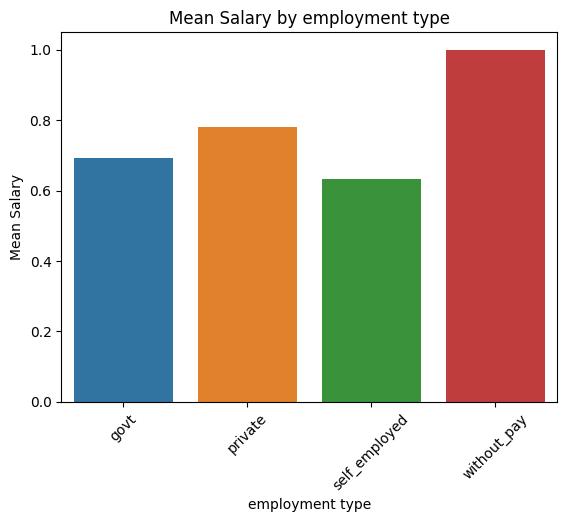

In [179]:
# Graficar la relacion entre 'employment type' y 'salary'
mean_salary_by_workclass = df.groupby('employment type')['salary'].mean().reset_index()

sn.barplot(x='employment type', y='salary', data=mean_salary_by_workclass)

plt.xlabel('employment type')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by employment type')

plt.xticks(rotation=45)  

plt.show()

In [180]:
#Convertir 'employment type' a int 
employmenttype_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}
df['employment type'] = df['employment type'].map(employmenttype_map)
df.head(4)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary,employment type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1


In [181]:
#Eliminar datos inecesarios
df.drop(labels=['work class','education','occupation'],axis=1,inplace=True)
df.head(4)


,age,fnlwgt,education num,marital status,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary,employment type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1


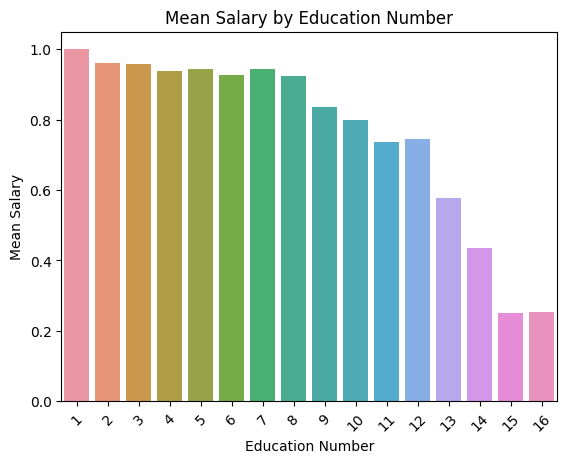

In [182]:
# Graficar la relacion entre 'education num' y 'salary'
mean_salary_by_education_num = df.groupby('education num')['salary'].mean().reset_index()

sn.barplot(x='education num', y='salary', data=mean_salary_by_education_num)

plt.xlabel('Education Number')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Education Number')

plt.xticks(rotation=45)  

plt.show()

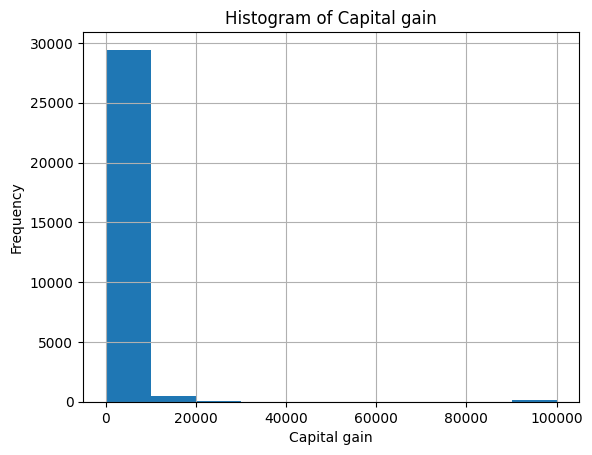

In [183]:
#Graficar un histograma para 'capital gain'
df['capital gain'].hist()

# Add labels and title
plt.xlabel('Capital gain')
plt.ylabel('Frequency')
plt.title('Histogram of Capital gain')

# Display the histogram
plt.show()

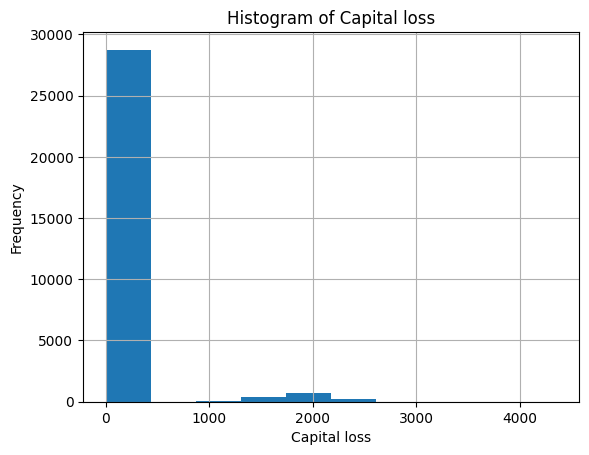

In [184]:
#Graficar un histograma para 'capital loss'
df['capital loss'].hist()

# Add labels and title
plt.xlabel('Capital loss')
plt.ylabel('Frequency')
plt.title('Histogram of Capital loss')

# Display the histogram
plt.show()

In [185]:
#Simplificar los datos 
df.loc[(df['capital gain'] > 0),'capital gain'] = 1
df.loc[(df['capital gain'] == 0 ,'capital gain')]= 0
df.loc[(df['capital loss'] > 0),'capital loss'] = 1
df.loc[(df['capital loss'] == 0 ,'capital loss')]= 0

df.head(5)

,age,fnlwgt,education num,marital status,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary,employment type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


# Generating Training and Testing Dataset

In [186]:
#Creacion de training set y testing set
### Drop salary 
# x = dataset sin feature
X = df.drop(['salary'], axis=1)

# convertiry a numpy array y asignar valores 
X = X.to_numpy()[:, (0,1,2,3,4,5,6,7,8,9,10,11)]

# y = dataset con feature 
y = df['salary']

# separar a train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)


In [187]:
##Visualizar training set y testing set

print('Min values of the dataset are: \n{}'.format(df.min()))
print('Max values of the dataset are: \n{}'.format(df.max()))

#Transformacion escalar para ajustar y normalizar los datos 
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
age                   17
fnlwgt             13769
education num          1
marital status         0
relationship           0
race                   0
sex                    0
capital gain           0
capital loss           0
hours per week         1
native country         0
salary                 0
employment type        0
dtype: int64
Max values of the dataset are: 
age                     90
fnlwgt             1484705
education num           16
marital status           1
relationship             5
race                     4
sex                      1
capital gain             1
capital loss             1
hours per week          99
native country           1
salary                   1
employment type          3
dtype: int64
Min values of the scaled dataset are: 
-3.5783900922996916
Max values of the scaled dataset are: 
12.274597232894362


# Classification

In [188]:
## definir Multi-layer Perceptron classifier
mlp_clf = MLPClassifier(
    # definir las capas
    #   el numero de neuronas por cada capa
    hidden_layer_sizes=(2),
    # numero maximo de iteraciones
    max_iter = 300,
    # funcion transfer/activation 
    activation = 'relu',
    # optimizador de pesos
    solver = 'adam'
    )


# Training

In [189]:
# Entrenar el modelo
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=2, max_iter=300)

# Testing


In [190]:
# Pasar la dataset para realizar pruebas 
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

# Evaluation


In [191]:
## Se evalua como fueron los resultados
# Accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# precision, recall, f1-score, and support
#   f1-score no se aplica en este caso
report_base = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      3794
           1       0.87      0.92      0.89     11287

    accuracy                           0.84     15081
   macro avg       0.79      0.75      0.77     15081
weighted avg       0.83      0.84      0.83     15081



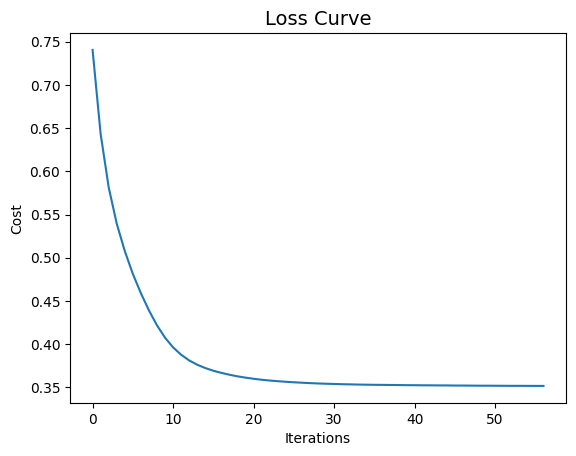

In [192]:
# Visualizar que de bien se entreno el modelo a traves de una Loss Curve
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

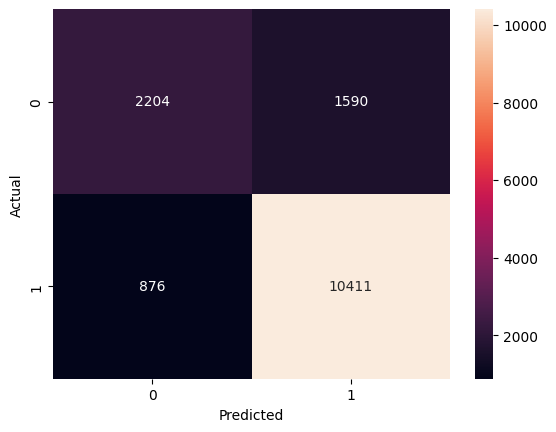

In [193]:
#Visualizar que de bien se entreno el modelo a traves de una matriz de confucion
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

In [194]:
# observar las predicciones 
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# observar los datos reales 
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
                  0
count  15081.000000
mean       0.795770
std        0.403152
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

Groundtruth 
count    15081.000000
mean         0.748425
std          0.433933
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: salary, dtype: float64


Hyper parameter Tuning

In [195]:
## Entrenar el modelo con diferentes parametros

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80), (100)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Debido a que param_grid tomo demasiado tiempo en ejecutarse en google colab(mas de una hora) y no se pudo ejecutar
# esta fue ejecutada en VSCode. Para simplificar el proceso se generaro param_grid_v2
param_grid_v2 = {
    'hidden_layer_sizes': [(150,100,50),(100)],
    'max_iter': [100],
    'activation': ['relu'],
    'solver': ['sgd'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

In [196]:
# definimos un enfoque de búsqueda de cuadrícula para entrenar varios modelos con validación cruzada
grid = GridSearchCV(
    # estructura del modelo en el que estamos interesados 
    mlp_clf,
    # hyper parametro que queremos entrenar
    param_grid_v2,
    # usar paralelisacion. -1 = utiliza todos 
    n_jobs = -1,
    # número de pliegues utilizados en el enfoque de validación cruzada
    cv = 5
    )

In [197]:
# Ejecutar hyper parameter tuning
grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=2, max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(150, 100, 50), 100],
                         'learning_rate': ['constant'], 'max_iter': [100],
                         'solver': ['sgd']})

Debido a que Hyper parameter tuning con para_grid tomo demasiado tiempo para ser ejecutada en Google colab, esta fue ejecutada en VSCode. 

En la siguiente imagen se muestran los resultados 




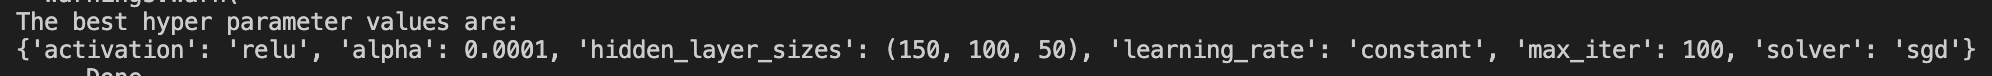

In [198]:
# Conseguir el valor ganador
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'sgd'}


In [199]:
# Guardar los datos obtenidos 
grid_results = pd.DataFrame(grid.cv_results_)

In [200]:
# Mostrar los resultados
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,36.145241,1.812429,0.031938,0.005174,relu,0.0001,"(150, 100, 50)",constant,100,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.845210,0.830570,0.826923,0.843833,0.825597,0.834427,0.008413,1
1,8.316736,1.463936,0.007426,0.000966,relu,0.0001,100,constant,100,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.839907,0.825928,0.829907,0.841180,0.826923,0.832769,0.006494,2


# Mejor modelo

In [201]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'sgd'}


In [202]:
#Convertir valores para que el programa los pueda reconocer
hidden_layer_sizes = grid.best_params_['hidden_layer_sizes']
hidden_layer_sizes = tuple(hidden_layer_sizes)
grid.best_params_['hidden_layer_sizes'] = hidden_layer_sizes
mlp_best = MLPClassifier(**grid.best_params_)

In [203]:
#Entrenar el modelo
mlp_best.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, solver='sgd')

In [204]:
# Pasar la dataset para realizar pruebas 
y_pred = mlp_best.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [205]:
# Se evalua como fueron los resultados
# Accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# precision, recall, f1-score, and support
#   f1-score no se aplica en este caso
print(classification_report(y_test, y_pred))
print('----------')
print(report_base)

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      3794
           1       0.87      0.92      0.90     11287

    accuracy                           0.84     15081
   macro avg       0.80      0.76      0.77     15081
weighted avg       0.83      0.84      0.83     15081

----------
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      3794
           1       0.87      0.92      0.89     11287

    accuracy                           0.84     15081
   macro avg       0.79      0.75      0.77     15081
weighted avg       0.83      0.84      0.83     15081



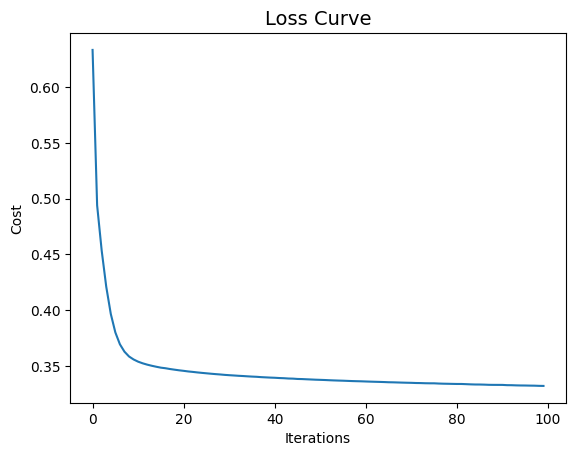

In [207]:
# Visualizar que de bien se entreno el modelo a traves de una Loss Curve
plt.plot(mlp_best.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

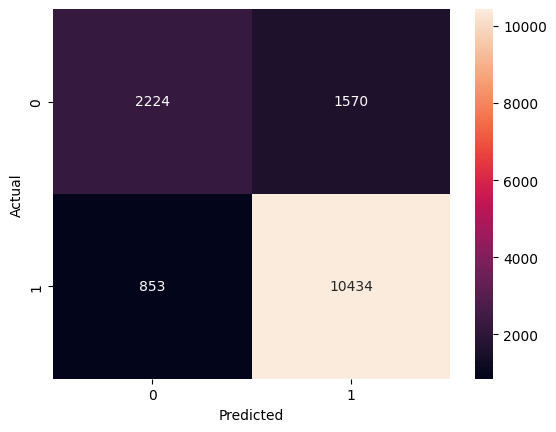

In [208]:
#Visualizar que de bien se entreno el modelo a traves de una matriz de confucion

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

In [209]:
# observar las predicciones 
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# observar los datos reales 
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
                  0
count  15081.000000
mean       0.795968
std        0.403006
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000

Groundtruth 
count    15081.000000
mean         0.748425
std          0.433933
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: salary, dtype: float64


# Regression

In [210]:
#Verificar que solo existen valores numericos
dataset.head()

,age,fnlwgt,education num,marital status,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary,employment type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


In [211]:
#Creacion de training set y testing set
### Drop salary 
# x = dataset sin feature
X = dataset.drop('salary', axis=1)

# convertiry a numpy array y asignar valores 
X = X.to_numpy()[:, (0,1,2,3,4,5,6,7,8,9,10,11)]

# y = dataset con feature 
y = dataset['salary']

# separar a train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [212]:
##Visualizar training set y testing set
print('Min values of the dataset are: \n{}'.format(df.min()))
print('Max values of the dataset are: \n{}'.format(df.max()))

#Transformacion escalar para ajustar y normalizar los datos 
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
age                   17
fnlwgt             13769
education num          1
marital status         0
relationship           0
race                   0
sex                    0
capital gain           0
capital loss           0
hours per week         1
native country         0
salary                 0
employment type        0
dtype: int64
Max values of the dataset are: 
age                     90
fnlwgt             1484705
education num           16
marital status           1
relationship             5
race                     4
sex                      1
capital gain             1
capital loss             1
hours per week          99
native country           1
salary                   1
employment type          3
dtype: int64
Min values of the scaled dataset are: 
-3.5783900922996916
Max values of the scaled dataset are: 
12.274597232894362


Defining the reggresion model

In [213]:
## definir Multi-layer Percepton regressor 
mlp_reg = MLPRegressor(
    # definir las capas
    #   el numero de neuronas por cada capa
    hidden_layer_sizes=(2),
    # numero maximo de iteraciones
    max_iter = 300,
    # funcion transfer/activation 
    activation = 'relu',
    # optimizador de pesos
    solver = 'adam'
    )

# Training

In [214]:
# Entrenar el modelo
mlp_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=2, max_iter=300)

# Testing

In [218]:
# Pasar la dataset para realizar pruebas 
y_pred = mlp_reg.predict(X_test_scaled)
y_pred

array([0.72247317, 0.82521033, 0.61453209, ..., 0.42086213, 0.96156989,
       0.96524521])

# Evaluation

In [221]:
# r2
#   Mejor valor es 1. Valores pueden ser negativos
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))
base_rep_r2 = r2_score(y_test, y_pred)
# mean square error
#   mejor valor es 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
base_rep_mse = mean_squared_error(y_test, y_pred)
# explained_variance_score
#   mejor valor es 1. mientras mas chico, peor
print('explained variance: {:.2f}'.format(explained_variance_score(y_test, y_pred)))
base_rep_var = explained_variance_score(y_test, y_pred)

r2: 0.38
mse: 0.12
explained variance: 0.38


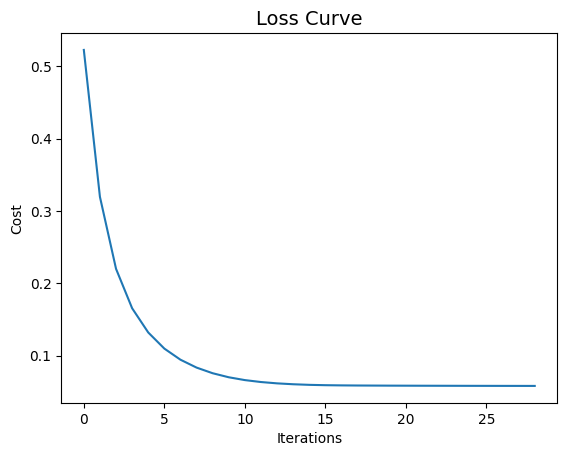

In [219]:
# Visualizar que de bien se entreno el modelo a traves de una Loss Curve
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

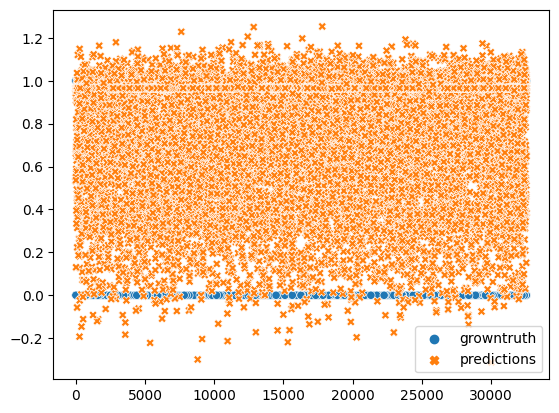

In [220]:
#Visualizar que de bueo fue el entrenamiento del modelo. 

regression_res_df = pd.DataFrame({'growntruth': y_test,'predictions': y_pred})

sn.scatterplot(regression_res_df)

# Hyper parameter tuning

In [222]:
## Entrenar el modelo con diferentes parametros
#   model
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80), (100)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Debido a que param_grid tomo demasiado tiempo en ejecutarse en google colab(mas de una hora) y no se pudo ejecutar
# esta fue ejecutada en VSCode. Para simplificar el proceso se generaro param_grid_v2
param_grid_v2 = {
    'hidden_layer_sizes': [(120,80), (100)],
    'max_iter': [50],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.05],
    'learning_rate': ['constant'],
}

In [223]:
# definimos un enfoque de búsqueda de cuadrícula para entrenar varios modelos con validación cruzada

grid = GridSearchCV(
    # estructura del modelo en el que estamos interesados 
    mlp_clf,
    # hyper parametro que queremos entrenar
    param_grid_v2,
    # usar paralelisacion. -1 = utiliza todos los procesos
    n_jobs = -1,
    # número de pliegues utilizados en el enfoque de validación cruzada
    cv = 5
    )

In [224]:
# Ejecutar hyper parameter tuning
grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=2, max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.05],
                         'hidden_layer_sizes': [(120, 80), 100],
                         'learning_rate': ['constant'], 'max_iter': [50],
                         'solver': ['adam']})

Debido a que Hyper parameter tuning con para_grid tomo demasiado tiempo para ser ejecutada en Google colab, esta fue ejecutada en VSCode. 

En la siguiente imagen se muestran los resultados 


**Result**
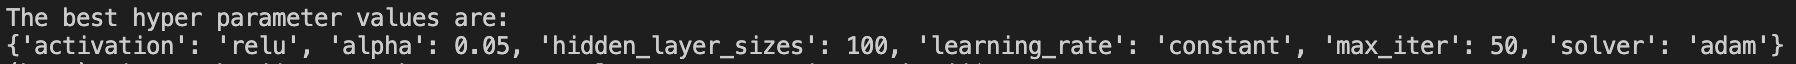

In [225]:
# Conseguir el valor ganador
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}


In [226]:
# Guardar los datos obtenidos 
grid_results = pd.DataFrame(grid.cv_results_)

In [227]:
# Mostrar los resultados
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,4.415722,0.692873,0.009282,0.003975,relu,0.05,100,constant,50,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.839907,0.831233,0.828581,0.842175,0.830239,0.834427,0.005513,1
0,10.528505,0.858461,0.022346,0.003962,relu,0.05,"(120, 80)",constant,50,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.837587,0.827255,0.820292,0.838859,0.826260,0.830051,0.007097,2


# With Values obtained by Hyper performance tuning

In [228]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}


In [229]:
#Convertir valores para que el programa los pueda reconocer

hidden_layer_sizes = grid.best_params_['hidden_layer_sizes']

if isinstance(hidden_layer_sizes, int):
    hidden_layer_sizes = (hidden_layer_sizes,)

grid.best_params_['hidden_layer_sizes'] = hidden_layer_sizes

mlp_best = MLPRegressor(**grid.best_params_)

In [230]:
#Entrenar el modelo
mlp_best.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.05, max_iter=50)

In [231]:
# Pasar la dataset para realizar pruebas 
y_pred = mlp_best.predict(X_test_scaled)
y_pred

array([0.67884915, 0.86423245, 0.69160808, ..., 0.35937499, 0.93944295,
       1.02211191])

In [233]:
# r2
#   Mejor valor es 1. Valores pueden ser negativos
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))

# mean square error
#   mejor valor es 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# explained_variance_score
#   mejor valor es 1. mientras mas chico, peor
print('explained variance: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

print('---------')
print('Base Model')
print('r2 : ',base_rep_r2)
print('mse : ',base_rep_mse)
print('var : ',base_rep_var)

r2: 0.40
mse: 0.11
explained variance: 0.40
---------
Base Model
r2 :  0.3808676154937761
mse :  0.11657330048865414
var :  0.3808827436593627


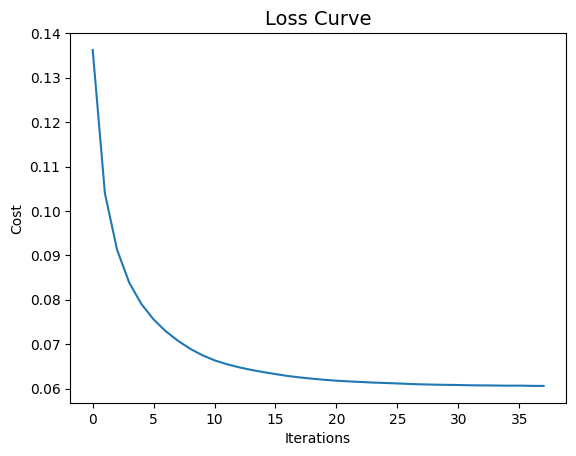

In [155]:
# Visualizar que de bien se entreno el modelo a traves de una Loss Curve
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

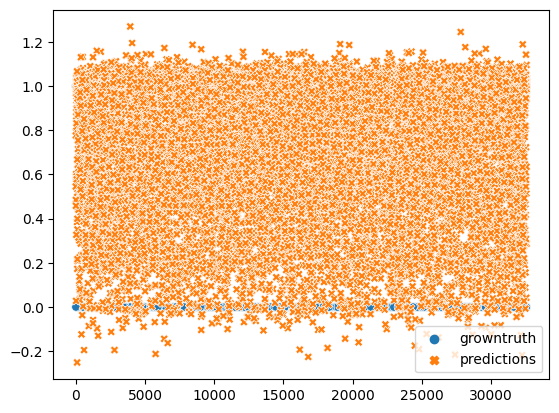

In [156]:
#Visualizar que de bueo fue el entrenamiento del modelo. 

regression_res_df = pd.DataFrame({'growntruth': y_test,'predictions': y_pred})

sn.scatterplot(regression_res_df)